## Размер выборки, мощность, статзначимость, размер эффекта

In [1]:
import math
import numpy as np
import statsmodels.stats.power as smp
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

Мощность критерия при данных effect_size, alpha, n

In [25]:
n = 450
alpha = 0.05
effect_size = 0.2

power = smp.zt_ind_solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='two-sided')
power

0.8508387683270561

Необходимое число наблюдений при данных alpha, power, effect_size

In [26]:
alpha = 0.05
power = 0.9
effect_size = 0.1

n = smp.zt_ind_solve_power(effect_size = effect_size, alpha = alpha, power = power, alternative='two-sided')
n

2101.483881928466

Величина эффекта при заданных n, alpha, power

In [27]:
alpha = 0.05
power = 0.9
n = 450

smp.zt_ind_solve_power(nobs1 = n, alpha = alpha, power = power)

0.2161027277843852

## t-Критерий Стьюдента. Посмотрим зависимость эффекта от размера выборки

In [13]:
effects = []
sample_sizes = []

for i in tqdm(range(50,2000)):
    effects.append(smp.tt_ind_solve_power(nobs1 = i, alpha = alpha, power = power))
    sample_sizes.append(i)

In [8]:
effects[:10]

[0.61007811171198,
 0.6039473708160522,
 0.5979987726385924,
 0.5922175089927145,
 0.586605269706221,
 0.5811494490351793,
 0.5758429413270956,
 0.5706790950542531,
 0.5656516708182773,
 0.5607548033983809]

Text(0, 0.5, 'Effect Amount')

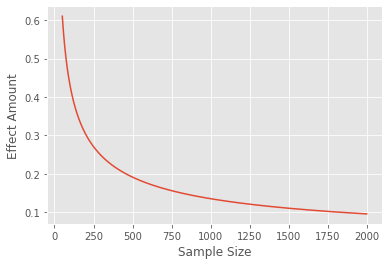

In [9]:
viz = sns.lineplot(x=sample_sizes, y=effects)
viz.set_xlabel("Sample Size")
viz.set_ylabel("Effect Amount")